# Hypothesis

we can predict how many medals a country will win at the Olympics using the historical data. 

# The Data

A data set of how many medals each country won at each Olympics. other data would be also be nice(number of athletes)

#importing the needed Libraries

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

importing the dataset with pandas and naming it as "teams"

In [81]:
teams = pd.read_csv('teams.csv')

In [82]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


#Removing the columns wich doesnt give that much of information or is not needed in running the algorithim

In [83]:
teams = teams[['team','country','year','athletes','age','prev_medals','medals']]

In [84]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


using corr() to find the strongest correlation between the columns we are trying to predict and the column we are trying to use to prdict.

In [85]:
teams.corr()['medals']

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

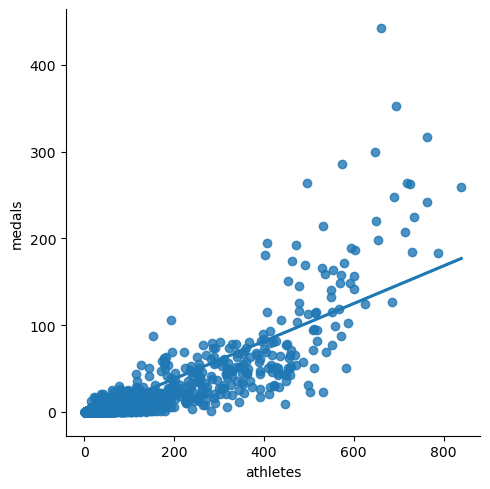

In [86]:
#using seaborn to plot a graph athletes vs medals and from that we can conclude that more no of athletes from a nation increases the chances of winning the multiple medals 
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True,ci=None)

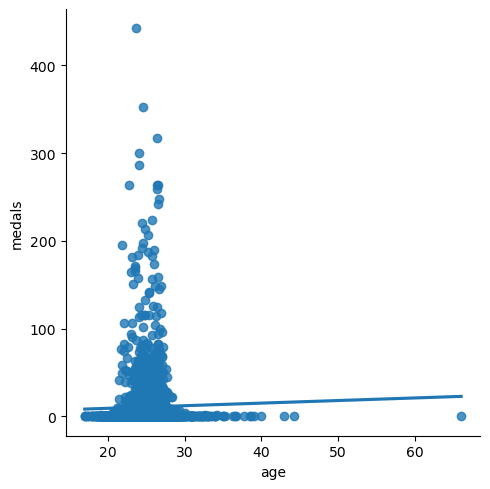

In [87]:
#So here we can see that there is no linear relationship between age and medals
sns.lmplot(x='age',y='medals',data=teams,fit_reg=True,ci=None)

<AxesSubplot:ylabel='Frequency'>

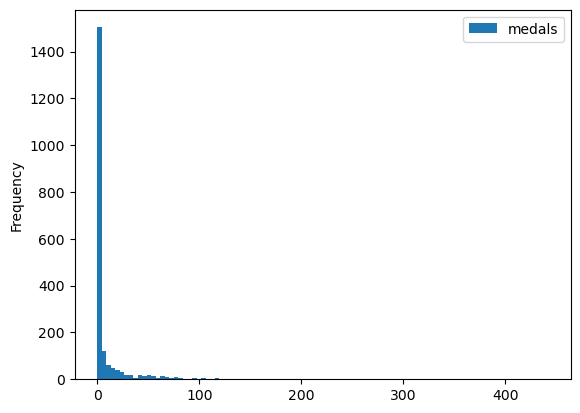

In [142]:
#From this histogram we can say that there are very few countries which have won more medals 
teams.plot.hist(y='medals',bins=100)

# Data Cleaning
Here we can see that there are some missing values in the pre_medals

In [89]:
teams.isnull().sum()

team             0
country          0
year             0
athletes         0
age              0
prev_medals    130
medals           0
dtype: int64

In [90]:
teams = teams.dropna()

In [91]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [92]:
teams['year'].value_counts()

2012    204
2016    201
2004    199
2008    199
2000    193
1996    166
1992    156
1988    146
1984    120
1972    105
1968     92
1976     88
1964     74
1980     71
Name: year, dtype: int64

As the data is the Timeseries data some rows come before other row so we want to split it in such a way that it respects that

In [93]:
train = teams[teams['year']<2012].copy()
test = teams[teams['year']>=2012].copy()

In [94]:
train.shape

(1609, 7)

In [95]:
test.shape

(405, 7)

In [96]:
test

,team,country,year,athletes,age,prev_medals,medals
6,AFG,Afghanistan,2012,6,24.8,1.0,1
7,AFG,Afghanistan,2016,3,24.7,1.0,0
24,ALB,Albania,2012,10,25.7,0.0,0
25,ALB,Albania,2016,6,23.7,0.0,0
37,ALG,Algeria,2012,39,24.8,2.0,1
...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0
2131,ZAM,Zambia,2012,7,22.6,0.0,0
2132,ZAM,Zambia,2016,7,24.1,0.0,0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


So this a good split as it follows the 80-20 split which is the close to default split value. This will give a good way to train algorithim

In [97]:
#scikit-learn is an amazing python machine learning library which has several machine learning algorithims in it
from sklearn.linear_model import LinearRegression

In [98]:
reg = LinearRegression()

In [99]:
predictors = ['athletes','prev_medals']
target = 'medals'

In [100]:
reg.fit(train[predictors],train['medals'])

LinearRegression()

In [101]:
predictions = reg.predict(test[predictors])

In [104]:
test['predictions']=predictions

In [105]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


So here we can say that some predictions have negative value and some have decimal points but for medal it needs to be a round value .To get that round value we have done the following steps

In [106]:
test.loc[test['predictions']<0,'predictions']=0

In [107]:
test['predictions']=test['predictions'].round()

In [108]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [109]:
from sklearn.metrics import mean_absolute_error

In [111]:
error = mean_absolute_error(test['medals'],test['predictions'])

In [112]:
error

3.2987654320987656

This means that on average we were within 3.3 medals of how many medals a team actually won in the olympics so wheather or not this is good value lets find out!

In [114]:
# First Check is that our error should be less than the standard deviation as it in this case it is far below than the std
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [116]:
test[test['team']=='USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [117]:
test[test['team']=='IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [118]:
errors = (test['medals']-test['predictions']).abs()

In [119]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [120]:
error_by_team = errors.groupby(test['team']).mean()

In [121]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [122]:
medals_by_team = test['medals'].groupby(test['team']).mean()

In [123]:
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [124]:
error_ratio = error_by_team / medals_by_team

In [125]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

So there are lots of Nan values here this means the teams have not won any medal therefore dividing it by any number makes it a nan Value

In [127]:
error_ratio.isna().sum()

102

Here are 102 Nan Values and we need to drop that

In [136]:
error_ratio = error_ratio.dropna()

In [130]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [133]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [140]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

For some countries the error ratio is very good like for example italy we are with 12 percent which is very good 

<AxesSubplot:ylabel='Frequency'>

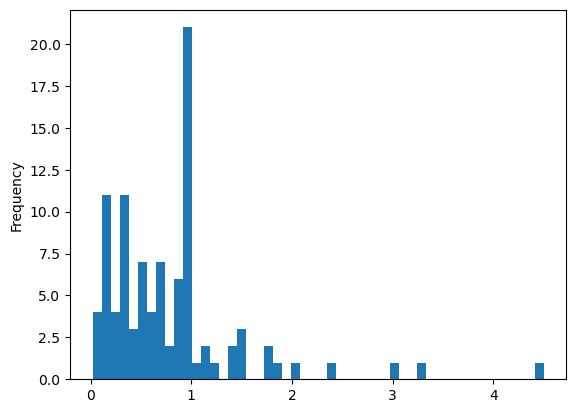

In [138]:
error_ratio.plot.hist(bins=50)

So this tell us that an error ratio of 0-0.5 means that you are within 50 percent of the actual medal count but in some cases 
here error ratio is 2 and above which means that our predictions were twice as high as the predicted medal or half of the 
predicted medal.This means we are pretty off from the true values


In [144]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

So in this case if we wanted to make predictions for the countries that tend to earn a lot of medals we have done pretty well .
The countries that tend to get lot of medals are Frane, Canada,Russia etc. The countries which sends many athletes for them our
model performed very well unlike other nation that we dont have much information or data about it .